# **instll kaggle**

In [1]:
# Step 1: Install Kaggle and Authenticate
!pip install -q kaggle


# **Connect with Kaggle API**

In [2]:
# Make sure to upload kaggle.json in Colab, then run these lines
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Download the Dataset**

In [3]:

# Download the dataset
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset
!unzip tuberculosis-tb-chest-xray-dataset.zip -d chest_xray


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
 98% 652M/663M [00:09<00:00, 96.0MB/s]
100% 663M/663M [00:09<00:00, 73.2MB/s]
Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: chest_xray/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: chest_xray/TB_Chest_Radiography_

# ***Import Libraries***

In [4]:


# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [5]:
# Set the image size and paths
IMG_SIZE = 128
BATCH_SIZE = 32
DATASET_PATH = '/content/chest_xray/TB_Chest_Radiography_Database'

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths for each class
normal_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Normal')
tuberculosis_path = os.path.join('/content/chest_xray/TB_Chest_Radiography_Database/', 'Tuberculosis')

# **Exploratry Data Analysis**

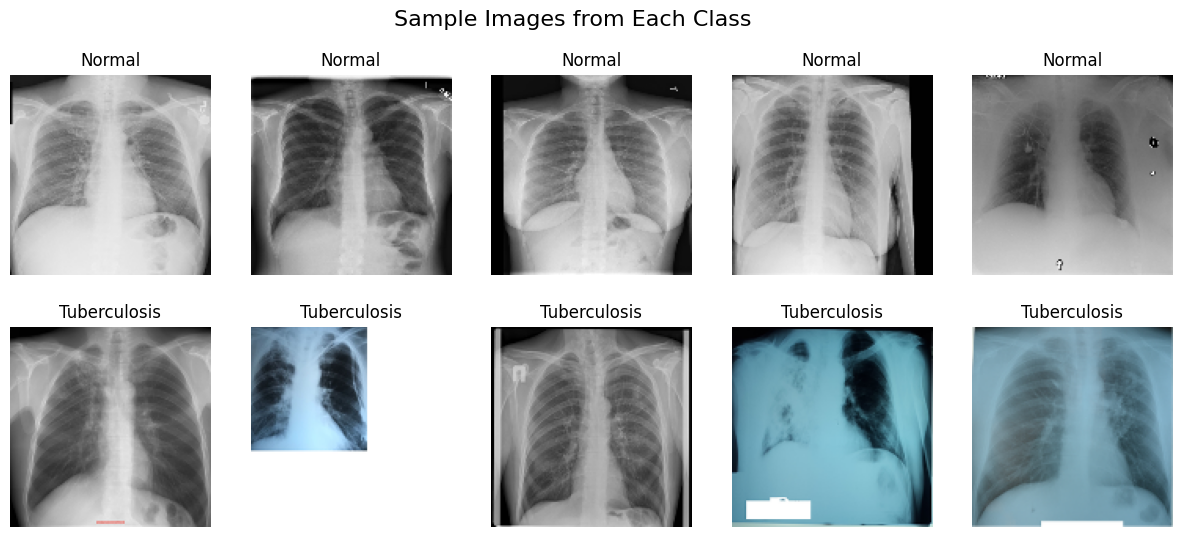

In [ ]:

# Function to plot sample images from each class
def plot_sample_images():
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Sample Images from Each Class', fontsize=16)

    # Load sample images from each class
    normal_images = random.sample(os.listdir(normal_path), 5)
    tuberculosis_images = random.sample(os.listdir(tuberculosis_path), 5)

    # Plot normal images
    for i, img_name in enumerate(normal_images):
        img = load_img(os.path.join(normal_path, img_name), target_size=(128, 128))
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title("Normal")


    # Plot tuberculosis images
    for i, img_name in enumerate(tuberculosis_images):
        img = load_img(os.path.join(tuberculosis_path, img_name), target_size=(128, 128))
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title("Tuberculosis")

    plt.show()

# Call the function
plot_sample_images()

Number of Normal images: 3500
Number of Tuberculosis images: 700


<ipython-input-8-67eb9ce1874c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Normal', 'Tuberculosis'], y=[normal_count, tuberculosis_count], palette='viridis')


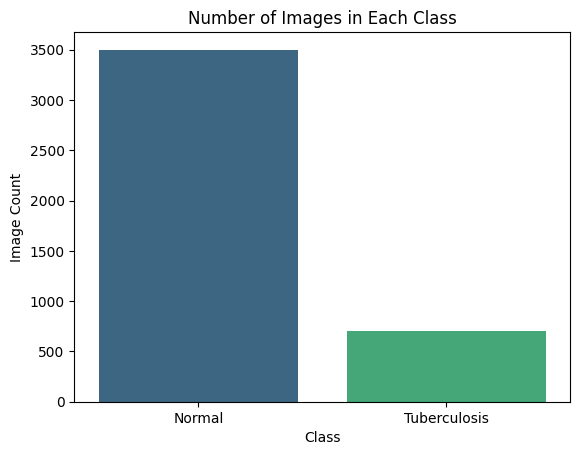

In [ ]:


# Function to plot image count for each class
def plot_image_counts():
    normal_count = len(os.listdir(normal_path))
    tuberculosis_count = len(os.listdir(tuberculosis_path))

    # Print the count of images in each class
    print(f"Number of Normal images: {normal_count}")
    print(f"Number of Tuberculosis images: {tuberculosis_count}")

    # Plot count of images in each class
    sns.barplot(x=['Normal', 'Tuberculosis'], y=[normal_count, tuberculosis_count], palette='viridis')
    plt.title('Number of Images in Each Class')
    plt.xlabel('Class')
    plt.ylabel('Image Count')
    plt.show()
# Call the functions

plot_image_counts()


In [ ]:
from PIL import Image

## **Structuring the dataset for Splitting training and Testing**

In [7]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset folder
dataset_path = "/content/chest_xray/TB_Chest_Radiography_Database"


# Define the list of label folders in the dataset folder
label_folders = ["Normal", "Tuberculosis"]

# Define the size of the input images
img_height = 128
img_width = 128

# Define an empty list to store the images and their labels
data = []
labels = []

# Loop over the label folders in the dataset folder
for label_folder in label_folders:
    # Define the path to the label folder
    label_path = os.path.join(dataset_path, label_folder)
    # Loop over the images in the label folder
    for img_name in os.listdir(label_path):
        # Define the path to the image
        img_path = os.path.join(label_path, img_name)
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_height, img_width))
        # Append the image and its label to the data and labels lists
        data.append(img)
        labels.append(label_folder)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Convert the labels to one-hot encoded vectors
# labels = to_categorical(labels)

# Print the shape of the data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (4200, 128, 128, 3)
Labels shape: (4200,)


In [8]:
import numpy as np


# Get the unique string values
unique_values = np.unique(labels)

# Create a mapping dictionary
mapping = {value: index for index, value in enumerate(unique_values)}

# Map the string values to numbers
mapped_arr = np.array([mapping[value] for value in labels])

print("Original array:", labels)
print("Mapped array:", mapped_arr)
print("Mapping dictionary:", mapping)

Original array: ['Normal' 'Normal' 'Normal' ... 'Tuberculosis' 'Tuberculosis'
 'Tuberculosis']
Mapped array: [0 0 0 ... 1 1 1]
Mapping dictionary: {'Normal': 0, 'Tuberculosis': 1}


# **Split 80 and 20**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,mapped_arr, test_size = 0.2,random_state=0,shuffle=True)

# CNN

In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers
input_shape = (128, 128,3)

model = models.Sequential([
    layers.Conv2D(128, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.02),
    layers.Flatten(),
    # layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid'),
])
#model.build(input_shape=input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │         508,033 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,617 (1.95 MB)

 Trainable params: 511,617 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - Precision: 0.4519 - Recall: 0.4594 - accuracy: 0.8164 - loss: 171.4433 - val_Precision: 0.9500 - val_Recall: 0.8000 - val_accuracy: 0.9658 - val_loss: 0.9786
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.8644 - Recall: 0.8127 - accuracy: 0.9466 - loss: 1.2479 - val_Precision: 0.9462 - val_Recall: 0.9263 - val_accuracy: 0.9821 - val_loss: 0.3365
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.9526 - Recall: 0.9041 - accuracy: 0.9754 - loss: 0.2670 - val_Precision: 0.7244 - val_Recall: 0.9684 - val_accuracy: 0.9435 - val_loss: 0.5330
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - Precision: 0.9154 - Recall: 0.9345 - accuracy: 0.9727 - loss: 0.1727 - val_Precision: 0.7541 - val_Recall: 0.9684 - val_accuracy: 0.9509 - val_loss: 0.4061
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - Precision: 0.9381 - Recall: 0.9605 - accuracy: 0.9809 - loss: 0.1219 - val_Precision: 0.8889 - val_Recall: 0.

## **Evalution**

In [37]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - Precision: 0.9347 - Recall: 0.8979 - accuracy: 0.9672 - loss: 0.2014
Evaluation Results: [0.3144782781600952, 0.9678571224212646, 0.9333333373069763, 0.8917197585105896]


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       683
           1       0.93      0.89      0.91       157

    accuracy                           0.97       840
   macro avg       0.95      0.94      0.95       840
weighted avg       0.97      0.97      0.97       840



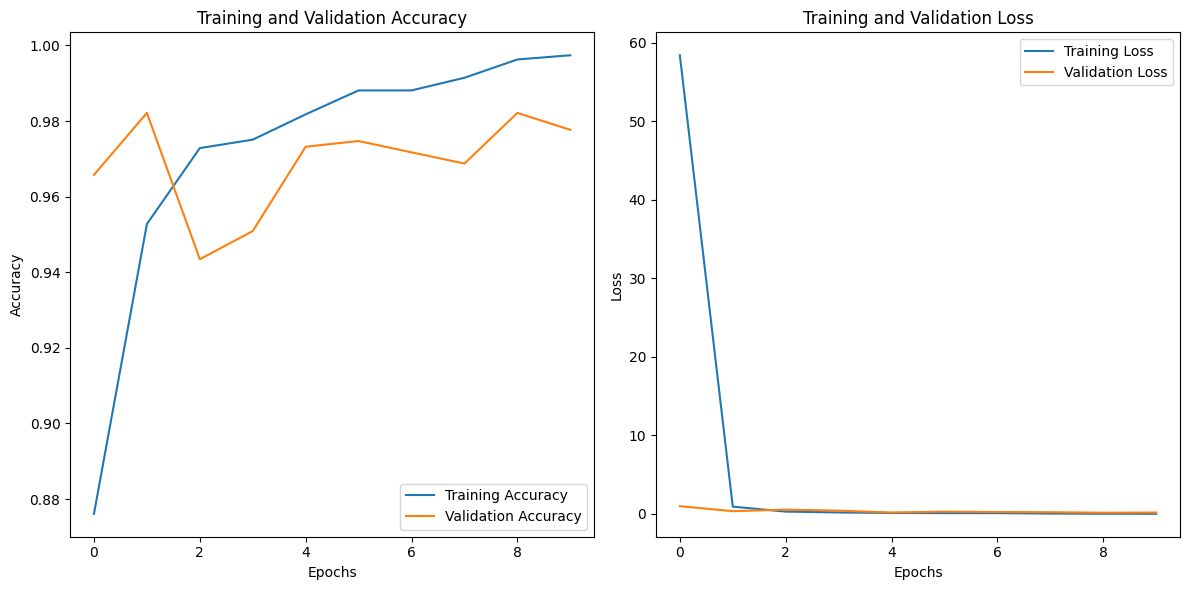

In [39]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


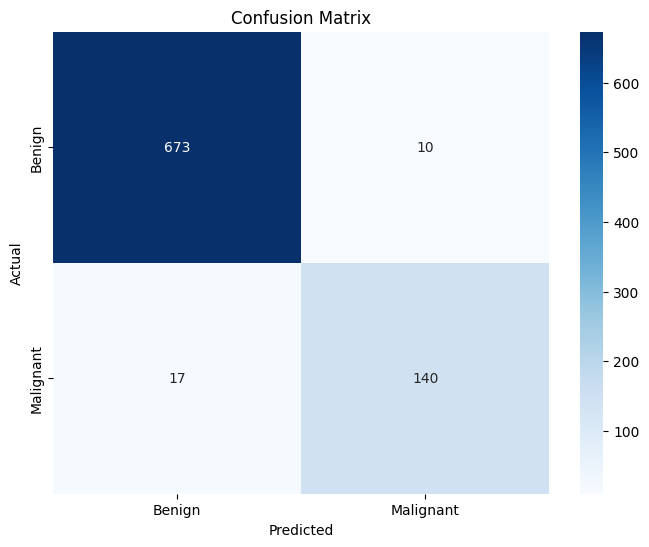

In [40]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **VGG16**

In [71]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0, VGG16,MobileNetV2
from tensorflow.keras.optimizers import Adam
input_shape = (128, 128,3)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,273 (56.63 MB)

 Trainable params: 131,585 (514.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [42]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")


X_train shape: (3360, 128, 128, 3), Y_train shape: (3360,)


In [43]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [44]:
# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - Precision: 0.2583 - Recall: 0.4700 - accuracy: 0.6894 - loss: 1.9069 - val_Precision: 0.8696 - val_Recall: 0.2105 - val_accuracy: 0.8839 - val_loss: 0.6122
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - Precision: 0.3480 - Recall: 0.3083 - accuracy: 0.7847 - loss: 1.3261 - val_Precision: 0.9130 - val_Recall: 0.2211 - val_accuracy: 0.8869 - val_loss: 0.5694
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - Precision: 0.4054 - Recall: 0.3048 - accuracy: 0.8039 - loss: 1.2727 - val_Precision: 0.8718 - val_Recall: 0.3579 - val_accuracy: 0.9018 - val_loss: 0.4576
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - Precision: 0.4487 - Recall: 0.3999 - accuracy: 0.8287 - loss: 1.0353 - val_Precision: 0.8696 - val_Recall: 0.4211 - val_accuracy: 0.9092 - val_loss: 0.3987
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - Precision: 0.5223 - Recall: 0.4297 - accuracy: 0.8369 - loss: 1.0775 - val_Precision: 0.8679 - val_Recall: 0.

## **Evalution**

In [47]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - Precision: 0.9474 - Recall: 0.6558 - accuracy: 0.9242 - loss: 0.3487
Evaluation Results: [0.3234829902648926, 0.9309523701667786, 0.9541284441947937, 0.662420392036438]


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       683
           1       0.95      0.66      0.78       157

    accuracy                           0.93       840
   macro avg       0.94      0.83      0.87       840
weighted avg       0.93      0.93      0.93       840



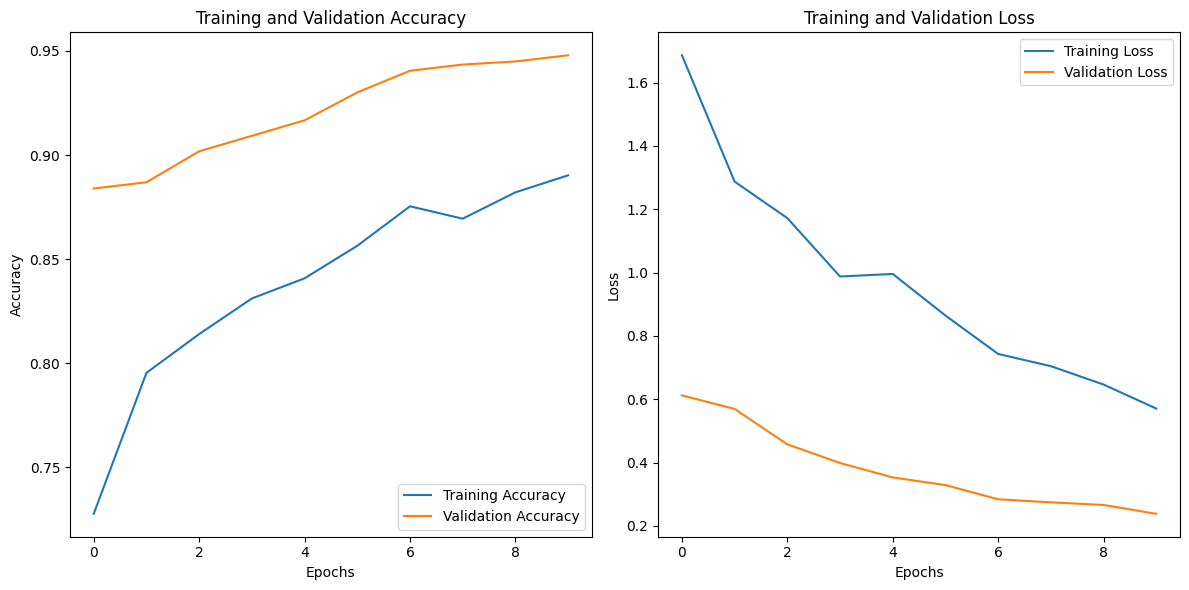

In [49]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


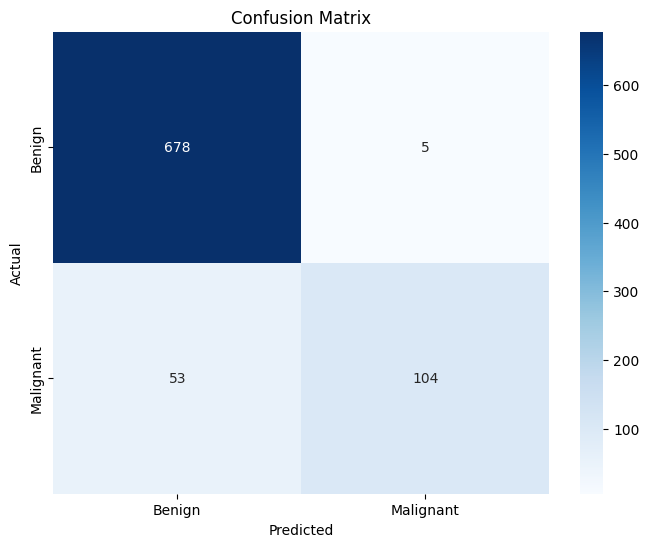

In [50]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **Rest Net Model**

In [61]:


input_shape = (128, 128,3)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])

In [62]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [63]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")


X_train shape: (3360, 128, 128, 3), Y_train shape: (3360,)


In [64]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [65]:
# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - Precision: 0.1798 - Recall: 0.4889 - accuracy: 0.5230 - loss: 1.1850 - val_Precision: 1.0000 - val_Recall: 0.0421 - val_accuracy: 0.8646 - val_loss: 0.3640
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - Precision: 0.3594 - Recall: 0.1913 - accuracy: 0.7935 - loss: 0.5407 - val_Precision: 0.9333 - val_Recall: 0.1474 - val_accuracy: 0.8780 - val_loss: 0.2739
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - Precision: 0.5637 - Recall: 0.3211 - accuracy: 0.8488 - loss: 0.4027 - val_Precision: 0.9756 - val_Recall: 0.4211 - val_accuracy: 0.9167 - val_loss: 0.2052
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - Precision: 0.6537 - Recall: 0.4105 - accuracy: 0.8563 - loss: 0.3625 - val_Precision: 0.9796 - val_Recall: 0.5053 - val_accuracy: 0.9286 - val_loss: 0.1679
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - Precision: 0.7353 - Recall: 0.5086 - accuracy: 0.8886 - loss: 0.2668 - val_Precision: 0.9508 - val_Recall: 0.6

## **Evalution**

In [66]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - Precision: 0.9808 - Recall: 0.7393 - accuracy: 0.9453 - loss: 0.1668
Evaluation Results: [0.1374858170747757, 0.9523809552192688, 0.9756097793579102, 0.7643312215805054]


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       683
           1       0.98      0.76      0.86       157

    accuracy                           0.95       840
   macro avg       0.96      0.88      0.91       840
weighted avg       0.95      0.95      0.95       840



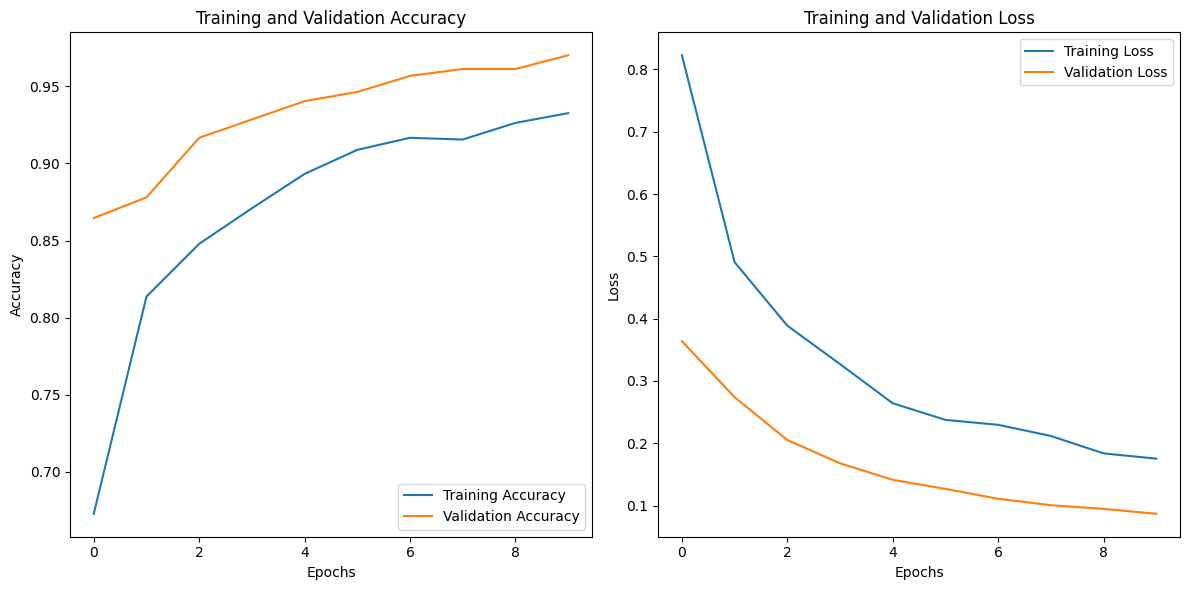

In [68]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


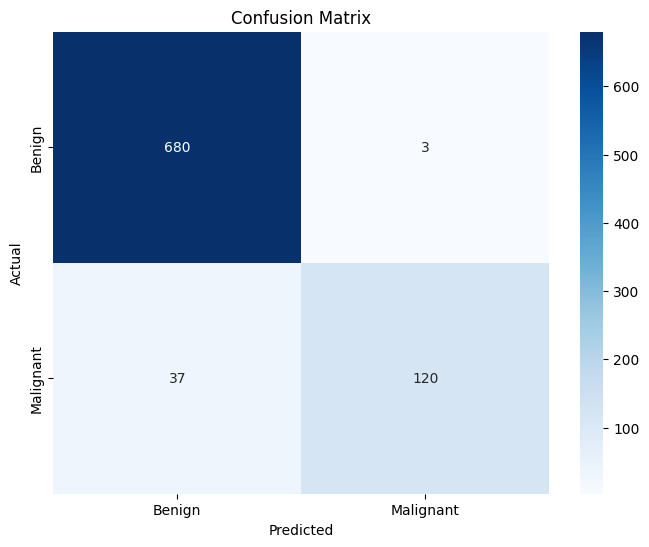

In [69]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# **MobileNetV2**

In [72]:


base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model initially
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


# Define the optimizer
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','Precision','Recall'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [73]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [74]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")


X_train shape: (3360, 128, 128, 3), Y_train shape: (3360,)


In [75]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [76]:
# Train the model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - Precision: 0.1839 - Recall: 0.1063 - accuracy: 0.7707 - loss: 0.5281 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8586 - val_loss: 0.3647
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - Precision: 0.4393 - Recall: 0.1008 - accuracy: 0.8321 - loss: 0.4279 - val_Precision: 1.0000 - val_Recall: 0.0526 - val_accuracy: 0.8661 - val_loss: 0.3141
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Precision: 0.6003 - Recall: 0.1834 - accuracy: 0.8474 - loss: 0.3968 - val_Precision: 1.0000 - val_Recall: 0.2211 - val_accuracy: 0.8899 - val_loss: 0.2759
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - Precision: 0.7614 - Recall: 0.2763 - accuracy: 0.8641 - loss: 0.3472 - val_Precision: 1.0000 - val_Recall: 0.3579 - val_accuracy: 0.9092 - val_loss: 0.2499
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - Precision: 0.8281 - Recall: 0.3731 - accuracy: 0.8790 - loss: 0.3279 - val_Precision: 1.0000 - val_Rec

## **Evalution**

In [77]:

# Evaluate the model
results = model.evaluate(X_test, Y_test)
print("Evaluation Results:", results)


27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - Precision: 0.9970 - Recall: 0.5435 - accuracy: 0.9090 - loss: 0.2164
Evaluation Results: [0.21314018964767456, 0.9166666865348816, 0.9887640476226807, 0.5605095624923706]


In [78]:
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Classification report
print(classification_report(Y_test, y_pred_classes))

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       683
           1       0.99      0.56      0.72       157

    accuracy                           0.92       840
   macro avg       0.95      0.78      0.83       840
weighted avg       0.92      0.92      0.91       840



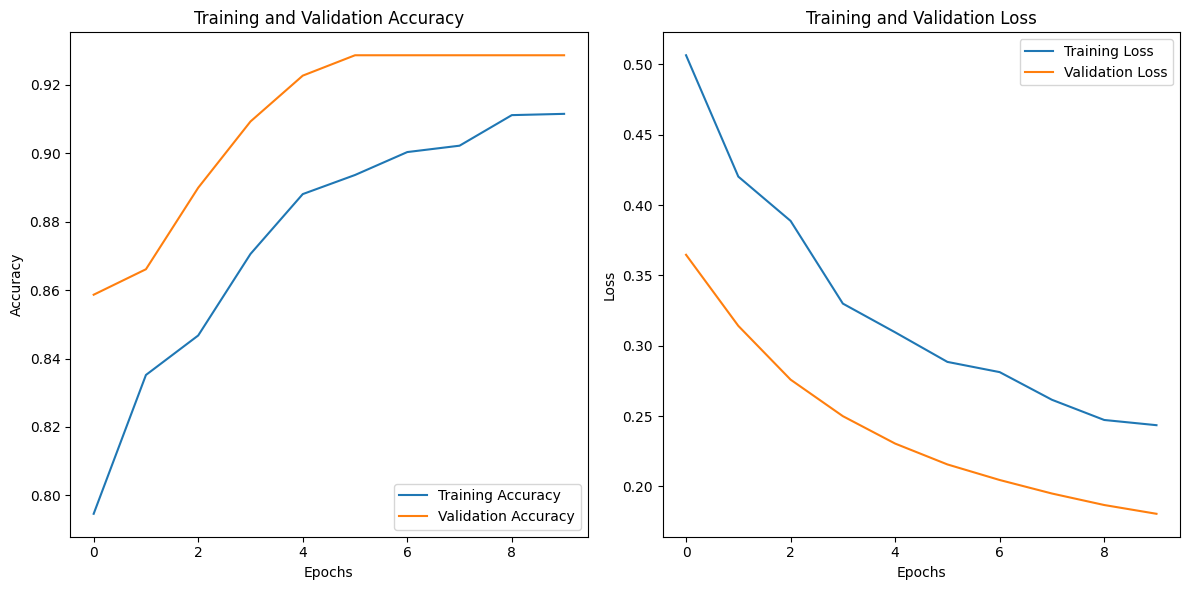

In [79]:

import matplotlib.pyplot as plt

# Extracting history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


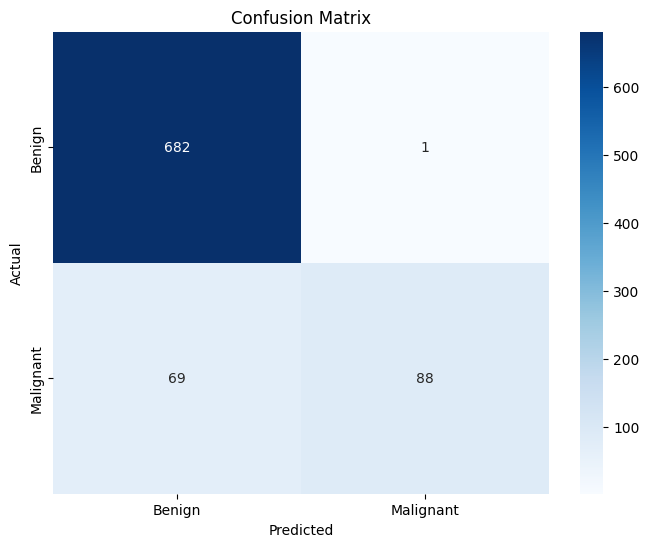

In [80]:

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()